<h1><center> Regression and gradient decent </center></h1><br>
<h1><center> Jonas Braun </center></h1><br>
<h1><center> 22.08.2019 </center></h1><br>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
figsize = (10.0, 6.0)

## 0. content
1. regression 
    1. generative model
    2. cost function + closed form solution
    3. making predictions
    4. polynomial regression
2. gradient descent
    1. principle
    2. batch gradient descent
    3. stochastic gradient descent
    4. mini-batch gradient descent
    5. comparison

# 1. regression
<center><img src="img\regression_params.png" alt="Drawing" style="width: 800px;"/></center>
<br>
GOAL: learn the parameters $\mathbf{\theta}=[\theta_0, \theta_1]$ of the linear model <br><br>
$y = \hat y + \epsilon = \theta_0 + \theta_1x + \epsilon$


## 1.1 generative model
$y = \hat y + \epsilon = \theta_0 + \theta_1x_1 + ... \theta_nx_n + \epsilon$ <br><br>
$y = \hat y + \epsilon = \mathbf{\theta}^\top\mathbf{x}+ \epsilon$
<br>
 - $y$: variable to be predicted
 - $\hat y$: estimate of $y$
 - $\epsilon$: model error
 - $x_j$: jth feature value
 - $\theta_0$: bias term
 - $\theta_j$: jth model parameter
<br><br>
 - $\mathbf{\theta}$: parameter vector **$\rightarrow$ want to find**
 - $\mathbf{x}$: feature vector

## 1.1 generative model
$y = \hat y + \epsilon = \theta_0 + \theta_1x_1 + ... \theta_nx_n + \epsilon$ <br><br>
$y = \hat y + \epsilon = \mathbf{\theta}^\top\mathbf{x}+ \epsilon$

In [2]:
M = 100  # number of samples
X = 2 * np.random.rand(M, 1)  # features (here: n=1)
theta = np.array([4, 3])
y = theta[0] + theta[1] * X + np.random.randn(M, 1)  # generative model

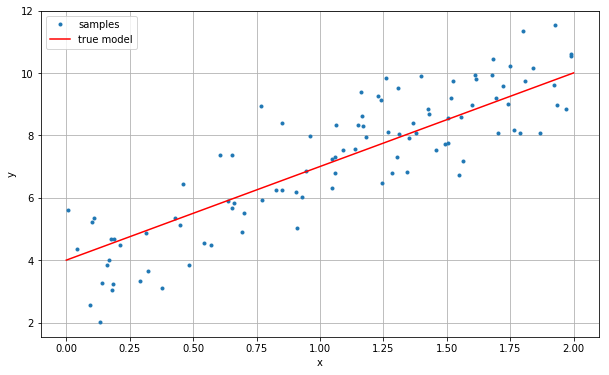

In [4]:
fig = plt.figure(figsize=figsize)
plt.plot(X, y, '.', label="samples")
plt.plot(np.linspace(0, 2, 10), theta[0] + theta[1] * np.linspace(0, 2, 10), 'r-', label="true model")
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");

## 1.2 cost function and closed form solution
$y = \mathbf{\theta}^\top\mathbf{x}+ \epsilon$

**GOAL**: find paramters $\mathbf{\theta}$ that minimise the squared error of the model for all M pairs of $\mathbf{x}$ and $y$ <br>
 $\rightarrow$ define cost function: $MSE(\theta)=\sum_{i=1}^M (y_i-\hat y_i)^2 
              = \frac{1}{M}\sum_{i=1}^M (y_i-\theta^\top\mathbf{X}_i)^2$
<center><img src="img\mse.png" alt="Drawing" style="width: 800px;"/></center>


## 1.2 cost function and closed form solution
$y = \mathbf{\theta}^\top\mathbf{x}+ \epsilon$ <br><br>
cost function: $MSE(\theta)=\sum_{i=1}^M (y_i-\hat y_i)^2 
              = \frac{1}{M}\sum_{i=1}^M (y_i-\theta^\top\mathbf{X}_i)^2$

##### step 1: taking partial derivative with respect to parameters
$\frac{\partial MSE(\theta)}{\partial \theta} 
   = \sum_{i=1}^M (y_i-\theta^\top\mathbf{X}_i) (-\mathbf{X}_i^\top) 
   = \sum_{i=1}^M \theta^\top\mathbf{X}_i \mathbf{X}_i^\top - y_i \mathbf{X}_i^\top $

##### step 2: setting derivative to 0
$\sum_{i=1}^M \theta^\top\mathbf{X}_i \mathbf{X}_i^\top - y_i \mathbf{X}_i^\top  = 0$
 

$\theta^\top \sum_{i=1}^M \mathbf{X}_i \mathbf{X}_i^\top= \sum_{i=1}^M y_i\mathbf{X}_i^\top$

$\theta^\top = (\sum_{i=1}^M y_i\mathbf{X}_i^\top)(\sum_{i=1}^M \mathbf{X}_i \mathbf{X}_i^\top)^{-1}$

$\theta^\top = (\sum_{i=1}^M y_i\mathbf{X}_i^\top)(\sum_{i=1}^M \mathbf{X}_i \mathbf{X}_i^\top)^{-1}$<br><br>
$\theta =(\mathbf{X}^\top\mathbf{X})^{-1}  \mathbf{X}^\top\mathbf{y}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ( = normal equation / pseudo-inverse)<br>
with $\mathbf{y}=[y_1, ..., y_M]^\top$ and  $\mathbf{X}=[X_1, ..., X_M]^\top$

In [5]:
X_b = np.c_[np.ones((M, 1)), X]
theta_est = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
print("theta: ", theta)
print("theta_est: ", theta_est)

theta:  [4 3]
theta_est:  [[ 3.63276816]
 [ 3.35236998]]


In [6]:
y_hat =  X_b @ theta_est
mse = np.mean(np.square(y-y_hat))
print("mean squared error", mse)

mean squared error 1.11358599617


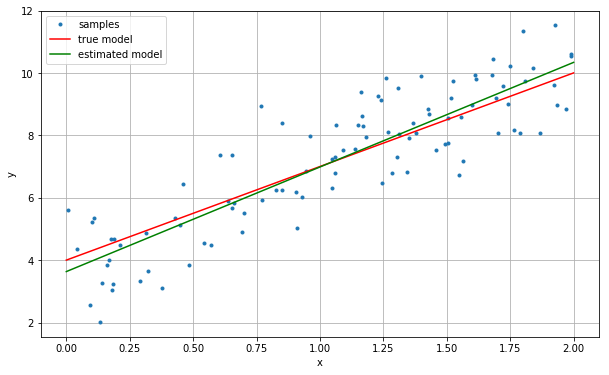

In [7]:
fig = plt.figure(figsize=figsize)
plt.plot(X, y, '.', label="samples")
plt.plot(np.linspace(0, 2, 10), theta[0] + theta[1] * np.linspace(0, 2, 10), 'r-', label="true model")
plt.plot(np.linspace(0, 2, 10), theta_est[0] + theta_est[1] * np.linspace(0, 2, 10), 
         'g-', label="estimated model")
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");

## 1.3 prediction model
$\hat y = \mathbf{\hat\theta}^\top\mathbf{x}$
 

In [8]:
X_new = np.array([[0.5], [1.5]]) 
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_est) 
y_predict 

array([[ 5.30895315],
       [ 8.66132313]])

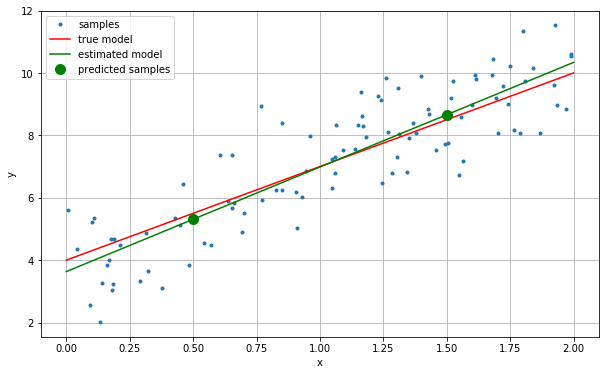

In [10]:
fig = plt.figure(figsize=figsize)
plt.plot(X, y, '.', label="samples")
plt.plot(np.linspace(0, 2, 10), theta[0] + theta[1] * np.linspace(0, 2, 10), 'r-', label="true model")
plt.plot(np.linspace(0, 2, 10), theta_est[0] + theta_est[1] * np.linspace(0, 2, 10), 
         'g-', label="estimated model")
plt.plot(X_new, y_predict, 'g.', markersize=20, label="predicted samples")

plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");

## 1.4 polynomial regression
$y = \hat y + \epsilon = \theta_0 + \theta_1x + \theta_2x^2 + \epsilon$ <br><br>


In [11]:
M = 100  # number of samples
X = 2 * np.random.rand(M, 1)  # features (here: N=1)
theta = np.array([6, -5, 10])
y = theta[0] + theta[1] * X + theta[2] * X**2 + 2*np.random.randn(M, 1)  # generative model

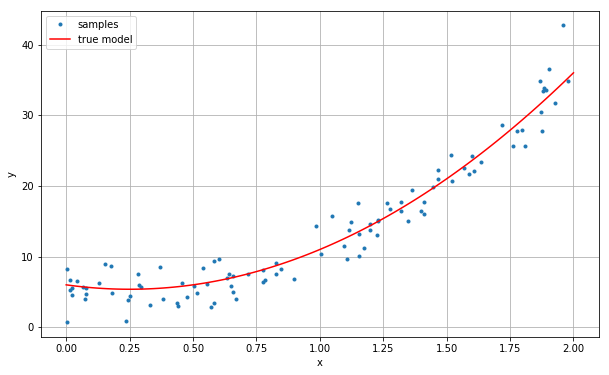

In [13]:
fig = plt.figure(figsize=figsize)
plt.plot(X, y, '.', label="samples")
plt.plot(np.linspace(0, 2, 100), theta[0] + theta[1] * np.linspace(0, 2, 100) + 
         theta[2] * np.linspace(0, 2, 100)**2,'r-', label="true model")
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");

### model as straigh line (as we did before)

In [14]:
X_b = np.c_[np.ones((M, 1)), X]
theta_est = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
print("theta: ", theta)
print("theta_est: ", theta_est)
print("mse: ", np.mean(np.square(y-X_b@theta_est)))

theta:  [ 6 -5 10]
theta_est:  [[ -0.06478187]
 [ 14.52609525]]
mse:  16.1890034342


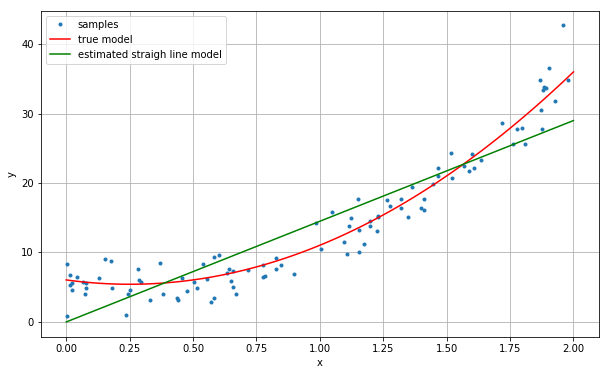

In [16]:
fig = plt.figure(figsize=figsize)
plt.plot(X, y, '.', label="samples")
plt.plot(np.linspace(0, 2, 100), theta[0] + theta[1] * np.linspace(0, 2, 100) + 
         theta[2] * np.linspace(0, 2, 100)**2,'r-', label="true model")
plt.plot(np.linspace(0, 2, 100), theta_est[0] + theta_est[1] * np.linspace(0, 2, 100), 
         'g-', label="estimated straigh line model")
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");

### model as parabola (2nd order polynomial)
trick: add square of x as additional feature: <br>
$x^*_i = [1, x_i, x_i^2]$ <br>
also possible with other non-linear functions, e.g. $\sin(x_i)$

In [17]:
X_b = np.c_[np.ones((M, 1)), X, X**2]
theta_est_sqare = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
print("theta: ", theta)
print("theta_est: ", theta_est_sqare)
print("mse: ", np.mean(np.square(y-X_b@theta_est_sqare)))

theta:  [ 6 -5 10]
theta_est:  [[  5.8058044 ]
 [ -5.78243312]
 [ 10.57949091]]
mse:  4.68177781935


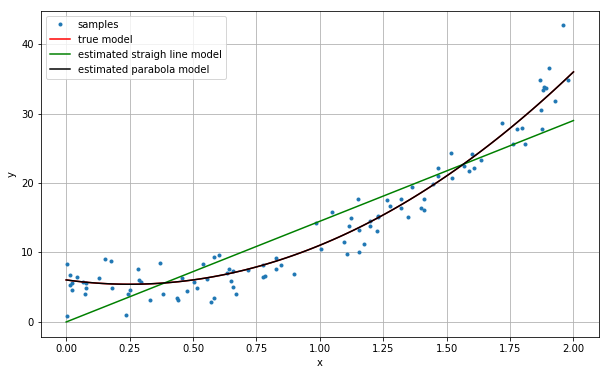

In [18]:
fig = plt.figure(figsize=figsize)
plt.plot(X, y, '.', label="samples")
plt.plot(np.linspace(0, 2, 100), theta[0] + theta[1] * np.linspace(0, 2, 100) + 
         theta[2] * np.linspace(0, 2, 100)**2,'r-', label="true model")
plt.plot(np.linspace(0, 2, 100), theta_est[0] + theta_est[1] * np.linspace(0, 2, 100), 
         'g-', label="estimated straigh line model")
plt.plot(np.linspace(0, 2, 100), theta[0] + theta[1] * np.linspace(0, 2, 100) + 
         theta[2] * np.linspace(0, 2, 100)**2,'k-', label="estimated parabola model")
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");

### modelling with higher model order than reality
$y = \hat y + \epsilon = \theta_0 + \theta_1x + \theta_2x^2 + ... + \theta_kx^k + \epsilon$ <br><br>


In [19]:
k = 12
X_b = np.squeeze(np.array([X**i for i in np.arange(k)])).T
theta_est_k = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
print("mse: ", np.mean(np.square(y-X_b@theta_est_k)))

mse:  4.90725059654


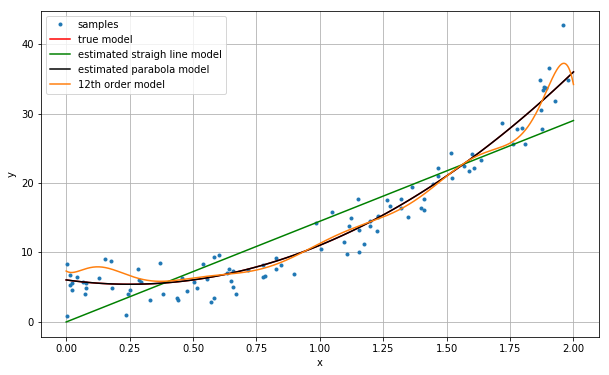

In [21]:
fig = plt.figure(figsize=figsize)
plt.plot(X, y, '.', label="samples")
plt.plot(np.linspace(0, 2, 100), theta[0] + theta[1] * np.linspace(0, 2, 100) + 
         theta[2] * np.linspace(0, 2, 100)**2,'r-', label="true model")
plt.plot(np.linspace(0, 2, 100), theta_est[0] + theta_est[1] * np.linspace(0, 2, 100), 
         'g-', label="estimated straigh line model")
plt.plot(np.linspace(0, 2, 100), theta[0] + theta[1] * np.linspace(0, 2, 100) + 
         theta[2] * np.linspace(0, 2, 100)**2,'k-', label="estimated parabola model")

y_hat = np.squeeze(np.array([np.linspace(0, 2, 1000)**i for i in np.arange(k)])).T @ theta_est_k
plt.plot(np.linspace(0, 2, 1000), y_hat,'-', label="{}th order model".format(k))
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");

# 2. gradient descent
<br>
MOTIVATION: minimise cost functions if no closed form solution exists or if number of dimensions very high

before: $MSE(\theta)=\sum_{i=1}^M (y_i-\hat y_i)^2 
              = \frac{1}{M}\sum_{i=1}^M (y_i-\theta^\top\mathbf{X}_i)^2$ 
<center><img src="img\mse.png" alt="Drawing" style="width: 500px;"/></center> <br>

possible: non-convex cost function with multiple minima and maxima
<center><img src="img\cost_fct.png" alt="Drawing" style="width: 500;"/></center> 

## 2.1 principle: iterative optimisation
<center><img src="img\gd.png" alt="Drawing" style="width: 600;"/></center> 

1. start with random initial parameters 
2. check slope
3. take a small step downhill
4. repeat 2. & 3. until at minimum

more technical:
1. start with random initial parameters $\hat\theta_0$
2. evaluate gradient (derivative) of cost function $C(\theta)$ at this set of parameters: $\nabla_\theta C(\hat\theta) = \frac{\partial }{\partial\theta}C(\theta)\rvert_{\hat\theta^{(i)}}$
3. take a small step towards $-\nabla_\theta$ with step size $\eta$:
    $\hat\theta^{(i+1)}=\hat\theta^{(i)} - \eta \nabla_\theta C(\hat\theta^{(i)})$
4. repeat 2. & 3. until $|\nabla_\theta C(\hat\theta)| < \epsilon$

## 2.2 example: batch GD on regression problem
from before: $\nabla_\theta C(\hat\theta) = \frac{\partial }{\partial\theta}C(\theta)\rvert_{\hat\theta}
=  \sum_{i=1}^M (y_i-\hat\theta^\top\mathbf{X}_i) (-\mathbf{X}_i^\top)$

In [22]:
M = 1000  # number of samples
X = 2 * np.random.rand(M, 1)  # features (here: n=1)
X_b = np.c_[np.ones((M, 1)), X]
theta = np.array([4, 3])
y = theta[0] + theta[1] * X + np.random.randn(M, 1)  # generative model

In [23]:
eta = 0.01  # learning rate --> try out different ones (0.01, 0.1, 0.5)
eps = 0.1  # stopping threshold --> try out different ones (0.1, 1)
n_iterations = 200 
mse = []
thetas = []
grads = []

theta_hat = np.random.randn(2,1)  # random initialization
for i in np.arange(n_iterations):    
    grad = 2/M * X_b.T.dot(X_b.dot(theta_hat) - y)    
    theta_hat = theta_hat - eta * grad
    grads.append(grad)
    thetas.append(theta_hat)
    mse.append(np.mean(np.square(y - X_b@theta_hat)))
    if np.linalg.norm(grad) < eps:  # stopping criterion
        break
print("performed {} iterations".format(i))
print("final parameters:", theta_hat.T)

performed 199 iterations
final parameters: [[ 3.50217529  3.44402013]]


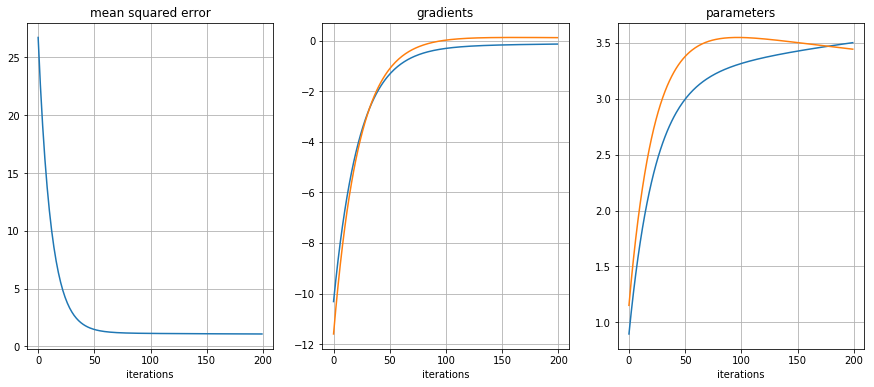

In [24]:
fig = plt.figure(figsize=(figsize[0]*1.5, figsize[1]))
ax = plt.subplot(1,3,1)
plt.plot(mse)
plt.title("mean squared error"); plt.grid(); plt.xlabel("iterations");
ax = plt.subplot(1,3,2)
plt.plot(np.squeeze(grads))
plt.title("gradients"); plt.grid(); plt.xlabel("iterations");
ax = plt.subplot(1,3,3)
plt.plot(np.squeeze(thetas))
plt.title("parameters"); plt.grid(); plt.xlabel("iterations");

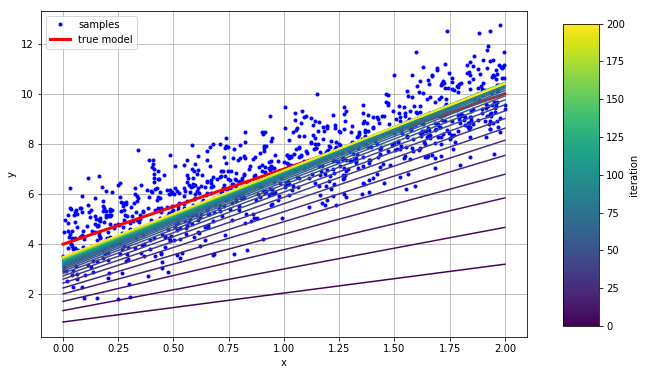

In [25]:
fig = plt.figure(figsize=figsize); ax = plt.subplot(1,1,1)
nth = 5
ax.set_prop_cycle('color', plt.cm.viridis(np.linspace(0, 1,np.int(len(thetas)/nth))))
plt.plot(X, y, 'b.', label="samples")
plt.plot(np.linspace(0, 2, 10), theta[0] + theta[1] * np.linspace(0, 2, 10), 'r-', label="true model", linewidth=3)
_ = [plt.plot(np.linspace(0, 2, 10), t[0] + t[1] * np.linspace(0, 2, 10)) for t in thetas[::nth]]
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=len(thetas)))
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("iteration")

## problems with batch gradient descent
 - sensitive to choice of learning rate $\rightarrow$ constantly decrease learning rate (annealing)
 - only finds local minima $\rightarrow$ multiple random initialisations or stochastic gradient descent
 - every step of batch GD expensive because computation of gradient with whole dataset  $\rightarrow$ stochastic gradient descent

## 2.3 stochastic gradient descent
IDEA: only compute gradient based a single, randomly chosen sample, but repeat multiple times<br>
$\rightarrow$ cheaper computation

## example: stochastic GD on regression

In [33]:
eta = 0.1  
eps = 0.01  # stopping threshold --> try out different ones (0.1, 1)
n_epochs = 10 
mse = []
thetas = []
grads = []

anneal = True  # try out with annealing!!!
t0, t1 = 5, 50  # learning schedule hyperparameters
def learning_schedule(t): return t0 / (t + t1)


theta_hat = np.random.randn(2,1)  # random initialization
for i_epoch in np.arange(n_epochs):
    for i in np.arange(M):
        random_index = np.random.randint(M)
        xi = X_b[random_index:random_index+1]        
        yi = y[random_index:random_index+1] 
        grad = 2 * xi.T.dot(xi.dot(theta_hat) - yi)
        eta = eta if not anneal else  learning_schedule(i_epoch * M + i) 
        theta_hat = theta_hat - eta * grad
        grads.append(grad)
        thetas.append(theta_hat)
        mse.append(np.mean(np.square(y - X_b@theta_hat)))
    if np.linalg.norm(grad) < eps:  # stopping criterion
        break
print("performed {} epochs".format(i_epoch))
print("final parameters:", theta_hat.T)

performed 9 epochs
final parameters: [[ 3.96059408  3.06924703]]


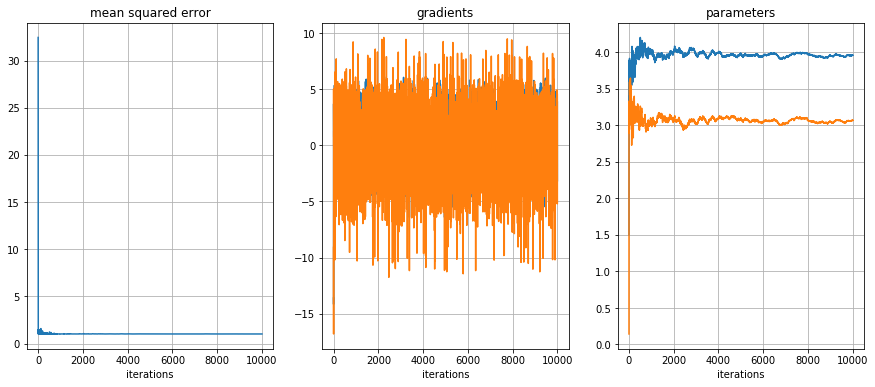

In [34]:
fig = plt.figure(figsize=(figsize[0]*1.5, figsize[1]))
ax = plt.subplot(1,3,1)
plt.plot(mse)
plt.title("mean squared error"); plt.grid(); plt.xlabel("iterations");
ax = plt.subplot(1,3,2)
plt.plot(np.squeeze(grads))
plt.title("gradients"); plt.grid(); plt.xlabel("iterations");
ax = plt.subplot(1,3,3)
plt.plot(np.squeeze(thetas))
plt.title("parameters"); plt.grid(); plt.xlabel("iterations");

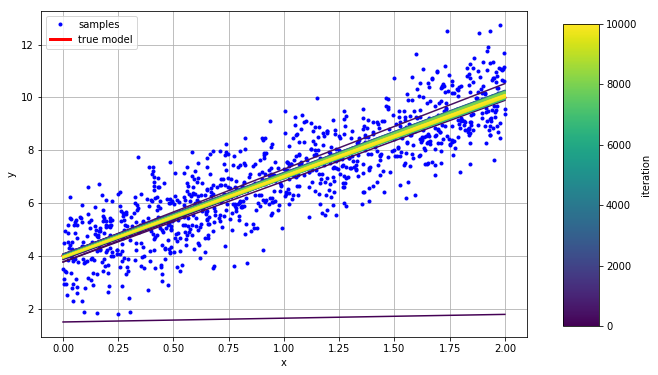

In [35]:
fig = plt.figure(figsize=figsize); ax = plt.subplot(1,1,1)
nth = 100
ax.set_prop_cycle('color', plt.cm.viridis(np.linspace(0, 1,np.int(len(thetas)/nth))))
plt.plot(X, y, 'b.', label="samples")
plt.plot(np.linspace(0, 2, 10), theta[0] + theta[1] * np.linspace(0, 2, 10), 'r-', label="true model", linewidth=3)
_ = [plt.plot(np.linspace(0, 2, 10), t[0] + t[1] * np.linspace(0, 2, 10)) for t in thetas[::nth]]
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=len(thetas)))
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("iteration")

## problem with stochastic gradient descent
 - never settles to optimal solution because of stochasticity of sample selection $\rightarrow$ reducing learning rate (annealing)

## 2.4 mini-batch gradient descent
 - compromise between batch gradient descent and stochastic gradient descent
 - always pick a subset of samples to compute the gradient of current step
 - can be optimised for processing on GPU (graphical processing unit)
 - possibility: increase batch size over time (similar to decreasing learning rate)

## example: mini-batch gradient descent

In [36]:
eta = 0.1  
eps = 0.01  # stopping threshold --> try out different ones (0.1, 1)
n_epochs = 10 
batch_size = 5
mse = []
thetas = []
grads = []

anneal = True  # try out with annealing!!!
t0, t1 = 5, 50  # learning schedule hyperparameters
def learning_schedule(t): return t0 / (t + t1)


theta_hat = np.random.randn(2,1)  # random initialization
for i_epoch in np.arange(n_epochs):
    for i in np.arange(np.int(M/batch_size)):
        random_index = np.random.randint(M, size=batch_size)
        xi = X_b[random_index, :]        
        yi = y[random_index] 
        grad = 2 * xi.T.dot(xi.dot(theta_hat) - yi)
        eta = eta if not anneal else  learning_schedule(i_epoch * M + i) 
        theta_hat = theta_hat - eta * grad
        grads.append(grad)
        thetas.append(theta_hat)
        mse.append(np.mean(np.square(y - X_b@theta_hat)))
    if np.linalg.norm(grad) < eps:  # stopping criterion
        break
print("performed {} epochs".format(i_epoch))
print("final parameters:", theta_hat.T)

performed 9 epochs
final parameters: [[ 3.96282366  3.0273738 ]]


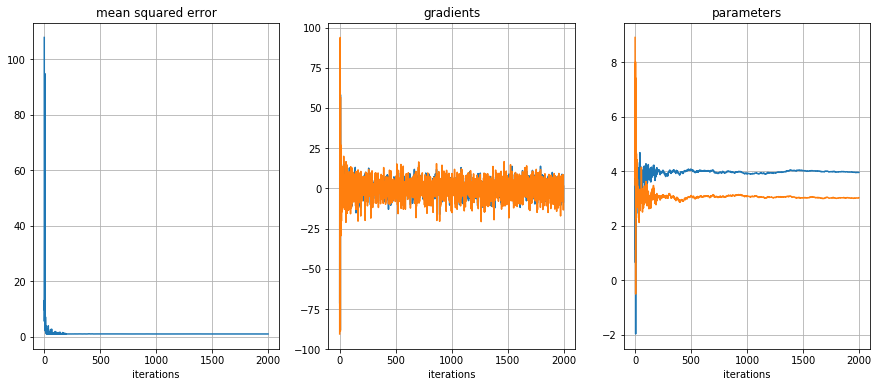

In [37]:
fig = plt.figure(figsize=(figsize[0]*1.5, figsize[1]))
ax = plt.subplot(1,3,1)
plt.plot(mse)
plt.title("mean squared error"); plt.grid(); plt.xlabel("iterations");
ax = plt.subplot(1,3,2)
plt.plot(np.squeeze(grads))
plt.title("gradients"); plt.grid(); plt.xlabel("iterations");
ax = plt.subplot(1,3,3)
plt.plot(np.squeeze(thetas))
plt.title("parameters"); plt.grid(); plt.xlabel("iterations");

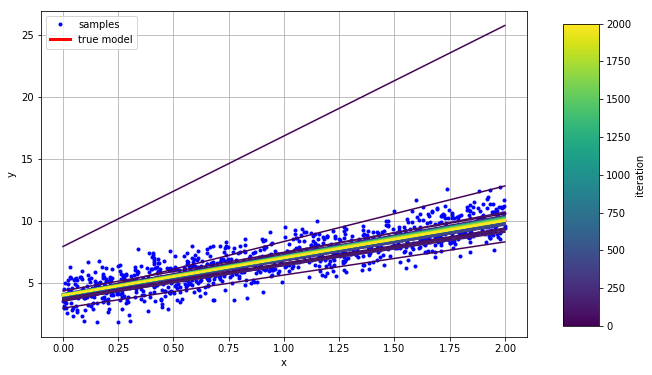

In [38]:
fig = plt.figure(figsize=figsize); ax = plt.subplot(1,1,1)
nth = 10
ax.set_prop_cycle('color', plt.cm.viridis(np.linspace(0, 1,np.int(len(thetas)/nth))))
plt.plot(X, y, 'b.', label="samples")
plt.plot(np.linspace(0, 2, 10), theta[0] + theta[1] * np.linspace(0, 2, 10), 'r-', label="true model", linewidth=3)
_ = [plt.plot(np.linspace(0, 2, 10), t[0] + t[1] * np.linspace(0, 2, 10)) for t in thetas[::nth]]
plt.grid(); plt.legend(); plt.xlabel("x"); plt.ylabel("y");
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=len(thetas)))
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("iteration")  

## 2.5 comparison
<br>
<table>
<tr>
<th>
.
</th>
<th>
    <font size="10">
closed form solution
        </font>
</th>
<th><font size="10">
batch gradient descent
</font></th>
<th><font size="10">
stochastic gradient descent
</font></th>
<th><font size="10">
stochastic gradient descent
</font></th>
</tr>
    
<tr>
<th><font size="10">
stability of solution
</font></th>
<th><font size="10">
very high
</font></th>
<th><font size="10">
very high
</font></th>
<th><font size="10">
medium
</font></th>
<th><font size="10">
high
</font></th>    
</tr>
 
<tr>
<th><font size="10">
sensibility to local minima
</font></th>
<th><font size="10">
n.a.
</font></th>
<th><font size="10">
high
</font></th>
<th><font size="10">
low
</font></th>
<th><font size="10">
medium
</font></th>    
</tr>

<tr>
<th><font size="10">
generality
</font></th>
<th><font size="10">
low
</font></th>
<th><font size="10">
high
</font></th>
<th><font size="10">
high
</font></th>
<th><font size="10">
high
</font></th>    
</tr>

<tr>
<th><font size="10">
high # samples
</font></th>
<th><font size="10">
fast
</font></th>
<th><font size="10">
slow
</font></th>
<th><font size="10">
fast
</font></th>
<th><font size="10">
fast
</font></th>    
</tr>

<tr>
<th><font size="10">
high # params
</font></th>
<th><font size="10">
slow
</font></th>
<th><font size="10">
fast
</font></th>
<th><font size="10">
fast
</font></th>
<th><font size="10">
fast
</font></th>    
</tr>
    
</table>


<center><img src="img\compare_gd.png" alt="Drawing" style="width: 600px;"/></center>

$\rightarrow$ use closed form solution wherever available and number of parameters not too high, otherwise batch gradient descent

## 2.5 comparison

| .| closed form solution | batch gradient descent | stochastic gradient descent | stochastic gradient descent descent |
| --- | --- | --- | --- | --- |
| stability of solution | very high | very high | medium | high | 
| sensibility to local minima | n.a. | high | low | medium|
| generality | low | high | high | high |
| high # samples | fast | slow | fast | fast |
| high # params | slow | fast | fast | fast |